In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

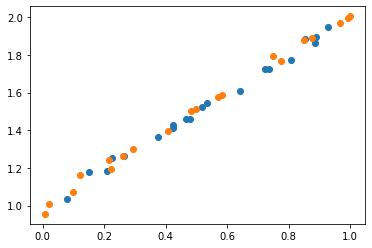

In [106]:
num_sample = 20
intercept = 1
sig_n = 0.02
slope = 1
x = np.random.rand(num_sample,1)
y = (x*slope) + intercept + sig_n*np.random.randn(num_sample,1)

x_t = np.random.rand(num_sample,1)
y_t = (x_t*slope) + intercept + sig_n*np.random.randn(num_sample,1)


plt.scatter(x, y)
plt.scatter(x_t, y_t)
plt.show()

X = np.concatenate((np.ones((num_sample,1)),x), axis=-1)
X_t = np.concatenate((np.ones((num_sample,1)),x_t), axis=-1)


In [107]:
kernel = lambda x,y: np.exp(-10*(x-y)@(x-y).T) # RBF 
#kernel = lambda x,y: x.T@y # linear 



In [108]:
def K(X,Y):
    num_sample = X.shape[0]
    C = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            C[i, j] = kernel(X[i,:], Y[j,:])
    return C

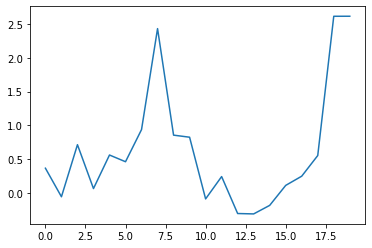

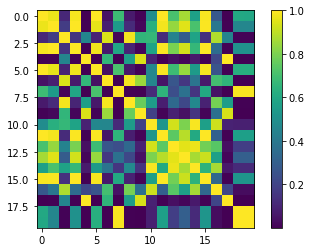

In [74]:
u = np.random.randn(num_sample, 1)
[U, S, V] = np.linalg.svd(K(X,X))
z = U@np.sqrt(np.diag(S))@u
plt.plot(z)
plt.show()
plt.imshow(K(X,X))

plt.colorbar()
plt.show()

In [75]:
mu_pos = K(X_t,X)@np.linalg.inv(K(X,X)+sig_n*np.eye(num_sample))@y
Cov_pos = K(X_t,X_t) - K(X_t, X)@np.linalg.pinv(K(X,X) + sig_n*np.eye(num_sample))@K(X,X_t)

In [76]:
print('R2')
1 - (np.sum((y_t-mu_pos)**2)/np.sum((y_t-np.mean(y_t))**2))

R2


0.9720884686583724

In [86]:
X_plot = np.arange(np.min(X[:,1]),np.max(X[:,1]),0.001)
X_plot = np.hstack((np.ones((X_plot.shape[0],1)) , X_plot.reshape(-1,1)))

In [87]:
mu_pos = K(X_plot,X)@np.linalg.inv(K(X,X)+sig_n*np.eye(num_sample))@y
Cov_pos = K(X_plot,X_plot) - K(X_plot, X)@np.linalg.pinv(K(X,X) + sig_n*np.eye(num_sample))@K(X,X_plot)


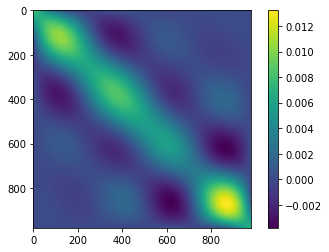

In [89]:
[U, S, V] = np.linalg.svd(Cov_pos)
plt.imshow(Cov_pos)
plt.colorbar()
plt.show()

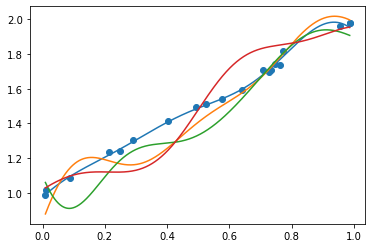

In [90]:
plt.plot(np.arange(np.min(X[:,1]),np.max(X[:,1]),0.001), mu_pos)
for _ in range(3):
    u = np.random.randn(Cov_pos.shape[0], 1)
    z = U@np.sqrt(np.diag(S))@u + mu_pos
    plt.plot(np.arange(np.min(X[:,1]),np.max(X[:,1]),0.001),z)
    
plt.scatter(X[:,1],y)



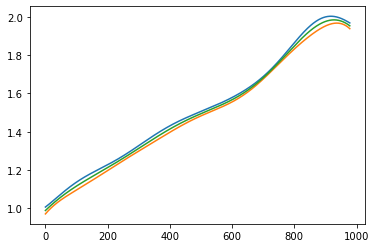

In [91]:
plt.plot((mu_pos.T + 2*np.diag(Cov_pos)).T)
plt.plot((mu_pos.T - 2*np.diag(Cov_pos)).T)
plt.plot(mu_pos)

In [134]:
L = np.linalg.cholesky(K(X,X)+sig_n*np.eye(X.shape[0]))
a = np.linalg.pinv(L.T)@ np.linalg.pinv(L)@y
y_pred = K(X_t,X)@a
v= np.linalg.pinv(L)*K(X_t,X_t).T
y_pred_v = K(X_t,X_t) - v.T@v

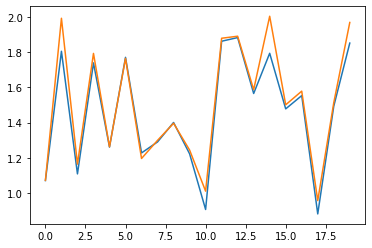

In [135]:
plt.plot(y_pred)
plt.plot(y_t)